# Debt to Income Ratio

Working in the mortgage industry had me wondering about how many people in the United States are currently able to qualify for a home loan. I found a dataset on Kaggle which aggregated household debt and home price to create an average debt-to-income ratio for each county. In order to get a qualified mortgage, one must have a debt- to income ratio of under 40%. Anything above that would be living above one's means. Using this information, I created the below visualizations.

I discovered that the Southern US has the highest percentage of people living above their means. This could be due to a number of factors: salaries not increasing as fast as the rising cost of housing, lack of jobs, people choosing houses they cannot afford, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
from config import user, apikey
plotly.tools.set_credentials_file(username=user, api_key=apikey)
import plotly.plotly as py
import plotly.figure_factory as ff

data = pd.read_csv("real_estate_db.csv", encoding='ISO-8859-1')
all_fips = pd.read_csv("all-geocodes-v2016.csv", encoding='ISO-8859-1')

In [2]:
rent_40_df = data[["rent_gt_40", 'STATEID', "COUNTYID", "state"]]
rent_40_df.head()

,rent_gt_40,STATEID,COUNTYID,state
0,0.15135,2,16,Alaska
1,0.20455,2,20,Alaska
2,0.54368,2,20,Alaska
3,0.27286,2,20,Alaska
4,0.24829,2,20,Alaska


In [3]:
rent_40_df.loc[:,"STATEID"] = rent_40_df["STATEID"].map("{:02d}".format)
rent_40_df.loc[:,"COUNTYID"] = rent_40_df["COUNTYID"].map("{:003d}".format)
rent_40_df["FIPS"] = rent_40_df["STATEID"].map(str) + rent_40_df["COUNTYID"].map(str)
rent_40_clean = rent_40_df.dropna(how='any')

In [4]:
grouped_data = rent_40_clean.groupby(["FIPS"])
mean_rent_40 = grouped_data.mean().reset_index()
mean_rent_40.head()

,FIPS,rent_gt_40
0,01001,0.348900
1,01003,0.312674
2,01005,0.386574
3,01007,0.254480
4,01009,0.361050


In [5]:
#Add leading zeros to federal geocodes dataframe
all_fips.loc[:,"State Code (FIPS)"] = all_fips["State Code (FIPS)"].map("{:02d}".format)
all_fips.loc[:,"County Code (FIPS)"] = all_fips["County Code (FIPS)"].map("{:003d}".format)

all_fips["FIPS"] = all_fips["State Code (FIPS)"].map(str) + all_fips["County Code (FIPS)"].map(str)

county_fips = all_fips[all_fips["County Code (FIPS)"] != "000"].reset_index()
clean_fips = county_fips[["FIPS"]]

In [6]:
#Merge to include missing counties
merge_table = pd.merge(clean_fips, mean_rent_40, how="outer")

#Fill missing counties with median
merge_table["rent_gt_40"].fillna(mean_rent_40["rent_gt_40"].median(), inplace=True)

merge_table.head()

,FIPS,rent_gt_40
0,01001,0.348900
1,01003,0.312674
2,01005,0.386574
3,01007,0.254480
4,01009,0.361050


I ran into several limitations with plotly at this stage. First, I encountered a runtime error due to such a large amount of data. I realized that I could not create one visualization of the full United States. I opted to break up the country into its main regions: Northeast, Midwest, South, and West. Additionally, I found that the sheer size of Alaska and distance of Hawaii forced the West plot to become too small to read. I made the decision to not include those two states.

In [7]:
northeast = merge_table.loc[merge_table["FIPS"].str[:2].isin(
    ["09", "23", "25", "33", "44", "50", "34", "36", "42"]
)].reset_index(drop=True)

midwest = merge_table.loc[merge_table["FIPS"].str[:2].isin(
    ["17", "18", "26", "39", "55", "19", "20", "27", "29", "31", "38", "46"]
)].reset_index(drop=True)

south = merge_table.loc[merge_table["FIPS"].str[:2].isin(
    ["10", "11", "12", "13", "24", "37", "45", "51", "54", "01", "21", "28", "47", "05", "22", "40", "48"]
)].reset_index(drop=True)

west = merge_table.loc[merge_table["FIPS"].str[:2].isin(
    ["04", "08", "16", "30", "32", "35", "49", "56", "06", "41", "53"]
)].reset_index(drop=True)

# Northeast

In [8]:
colorscale = ["00E53D","00E219","09DF00","2BDD00","4DDA00","6DD800","8DD500","ACD300",\
              "CBD000","CEB300","CB9200","C97100","C65000","C43100","C11200","BF000A"]    
    
endpts = list(np.linspace(0, 0.86364, len(colorscale) - 1))
fips = northeast["FIPS"]
values = northeast["rent_gt_40"]
scope = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "New Jersey", "Vermont", "New York", "Pennsylvania"]

fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=endpts, scope=scope,
                           colorscale=colorscale, county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                          title='Northeast: Rent Exceeds 40% of Income',
                          legend_title='% of Population')
py.iplot(fig, filename='northeast')

C:\Users\rayne\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


C:\Users\rayne\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



# Midwest

In [9]:
colorscale = ["00E53D","00E219","09DF00","2BDD00","4DDA00","6DD800","8DD500","ACD300",\
              "CBD000","CEB300","CB9200","C97100","C65000","C43100","C11200","BF000A"]    
    
endpts = list(np.linspace(0, 0.86364, len(colorscale) - 1))
fips = midwest["FIPS"]
values = midwest["rent_gt_40"]
scope = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Kansas", "Minnesota", \
         "Missouri", "Nebraska", "North Dakota", "South Dakota"]

fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=endpts, scope=scope,
                           colorscale=colorscale, county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                          title='Midwest: Rent Exceeds 40% of Income',
                          legend_title='% of Population')
py.iplot(fig, filename='midwest')

C:\Users\rayne\Anaconda3\lib\site-packages\plotly\plotly\plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


C:\Users\rayne\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



# South

In [10]:
colorscale = ["00E53D","00E219","09DF00","2BDD00","4DDA00","6DD800","8DD500","ACD300",\
              "CBD000","CEB300","CB9200","C97100","C65000","C43100","C11200","BF000A"]    
    
endpts = list(np.linspace(0, 0.86364, len(colorscale) - 1))
fips = south["FIPS"]
values = south["rent_gt_40"]
scope = ["Delaware", "District of Columbia", "Florida", "Georgia", "Maryland", "North Carolina", \
         "South Carolina", "Virginia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", \
         "Arkansas", "Louisiana", "Oklahoma", "Texas"]

fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=endpts, scope=scope,
                           colorscale=colorscale, county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                          title='South: Rent Exceeds 40% of Income',
                          legend_title='% of Population')
py.iplot(fig, filename='south')

# West

In [11]:
colorscale = ["00E53D","00E219","09DF00","2BDD00","4DDA00","6DD800","8DD500","ACD300",\
              "CBD000","CEB300","CB9200","C97100","C65000","C43100","C11200","BF000A"]    
    
endpts = list(np.linspace(0, 0.86364, len(colorscale) - 1))
fips = west["FIPS"]
values = west["rent_gt_40"]
scope = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", \
         "California", "Oregon", "Washington"]

fig = ff.create_choropleth(fips=fips, values=values, binning_endpoints=endpts, scope=scope,
                           colorscale=colorscale, county_outline={'color': 'rgb(255,255,255)', 'width': 0.25},
                          title='West: Rent Exceeds 40% of Income',
                          legend_title='% of Population')
py.iplot(fig, filename='west')

# Top 100 Counties

After viewing these choropleths, my next question was: Which region is struggling the most? I proceeded to collect 100 counties with the highest debt-to-income ratio into a pie chart. It is clear that the South has the most counties in peril at 63 in total. The remaining regions combined make up the final third of the top 100. Unfortunately Plotly does not have the ability to show US territories which make up the next highest region at 16%.

In [12]:
top_100 = mean_rent_40.sort_values(["rent_gt_40"], ascending = False).head(100).reset_index(drop = True)

In [13]:
northeast = 0
midwest = 0
south = 0
west = 0
territory = 0

for value in top_100["FIPS"]:
    if value[:2] in ("09", "23", "25", "33", "44", "50", "34", "36", "42"):
        northeast += 1
    elif value[:2] in ("17", "18", "26", "39", "55", "19", "20", "27", "29", "31", "38", "46"):
        midwest += 1
    elif value[:2] in ("10", "11", "12", "13", "24", "37", "45", "51", "54", "01", "21", "28", "47", "05", "22", "40", "48"):
        south += 1
    elif value[:2] in ("04", "08", "16", "30", "32", "35", "49", "56", "02", "06", "15", "41", "53"):
        west += 1
    else:
        territory += 1

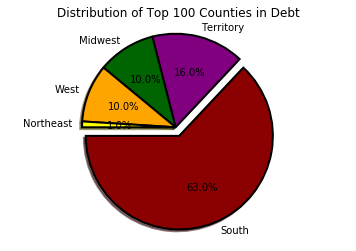

In [14]:
labels = ["South", "Territory", "Midwest", "West", "Northeast"]
sizes = [south, territory, midwest, west, northeast]
colors = ["darkred", "purple", "darkgreen", "orange", "yellow"]
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,
       wedgeprops={"edgecolor":"k",'linewidth': 2})

plt.axis("equal")
plt.title("Distribution of Top 100 Counties in Debt")
plt.show()